<a href="https://colab.research.google.com/github/eduardopadilla3/Unit2_BW_code/blob/master/Unit2project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
from datetime import datetime, timedelta, date, time
from time import strftime
import os

curr_path = os.getcwd()
csv_name = 'str_hilo_253.csv'
output_file = '%s\\data\\%s' % (curr_path,csv_name)
error_file = '%s\\error.txt' % (curr_path)

if os.path.exists(error_file):
    os.remove(error_file)

# Match date
current_match_date = datetime.now()
current_time = datetime.now().time()
if current_time >= time(0,0) and current_time <= time(11, 30):
    previous_day = current_match_date - timedelta(days=1)
    current_match_date = previous_day
db_match_date = current_match_date.strftime("%Y%m%d")
current_match_date = current_match_date.strftime("%Y-%m-%d 11:30:00")

ou_hdc = 'OU25'

print('Execution time: %s' % strftime('%Y-%m-%d %H:%M:%S'))
print('Current match date: %s' % current_match_date)

Execution time: 2020-10-11 15:17:49
Current match date: 2020-10-11 11:30:00


In [201]:
import cx_Oracle
import codecs

db_user = 'JW'
db_password = '901203'
db_dsn = 'HOME-PC/XE'
db_encoding = 'UTF-8'

# Database connection
connection = None
try:
    connection = cx_Oracle.connect(
        db_user,
        db_password,
        db_dsn,
        encoding=db_encoding)

    c = connection.cursor()
    
    if os.path.exists(output_file):
        os.remove(output_file)
    
    file = codecs.open(output_file, "a+", "utf-8")

    # write file header
    file.write('MATCH_ID,MATCH_DATETIME,LEAGUE,HOME_TEAM,AWAY_TEAM,HOME_FT_GOAL,AWAY_FT_GOAL,TOTAL_GOAL_COUNT,ML_TYPE,STR_OU_MODE_HDC,STR_OU_MACAU_HDC,STR_OU_BET365_HDC,STR_OU_YINGYO_HDC,STR_OU_PINGBOK_HDC,STR_OU_HKJC_HDC,STR_OU_AVG_HI,STR_OU_MEDIAN_HI,STR_OU_MACAU_HI,STR_OU_BET365_HI,STR_OU_YINGWO_HI,STR_OU_PINGBOK_HI,STR_OU_HKJC_HI,STR_OU_MACAU_HI_DIFF,STR_OU_BET365_HI_DIFF,STR_OU_YINGWO_HI_DIFF,STR_OU_PINGBOK_HI_DIFF,STR_OU_HKJC_HI_DIFF,STR_OU_AVG_LO,STR_OU_MEDIAN_LO,STR_OU_MACAU_LO,STR_OU_BET365_LO,STR_OU_YINGWO_LO,STR_OU_PINGBOK_LO,STR_OU_HKJC_LO,STR_OU_MACAU_LO_DIFF,STR_OU_BET365_LO_DIFF,STR_OU_YINGWO_LO_DIFF,STR_OU_PINGBOK_LO_DIFF,STR_OU_HKJC_LO_DIFF,HOME_TOTAL_GF,HOME_TOTAL_GA,HOME_AVG_GF,HOME_HOME_GF,HOME_HOME_GA,HOME_HOME_AVG_GF,AWAY_TOTAL_GF,AWAY_TOTAL_GA,AWAY_AVG_GF,AWAY_AWAY_GF,AWAY_AWAY_GA,AWAY_AWAY_AVG_GF,HOME_ADV,AWAY_ADV,GAME_POINT,STR_MACAU_H,STR_BET365_H,STR_YINGWO_H,STR_PINNACLE_H,STR_HKJC_H,STR_MACAU_D,STR_BET365_D,STR_YINGWO_D,STR_PINNACLE_D,STR_HKJC_D,STR_MACAU_A,STR_BET365_A,STR_YINGWO_A,STR_PINNACLE_A,STR_HKJC_A\n')
    sql = """
        SELECT
            info.MATCH_ID, info.MATCH_DATETIME, info.LEAGUE, info.HOME_TEAM, info.AWAY_TEAM, info.HOME_FT_GOAL, info.AWAY_FT_GOAL, info.HOME_FT_GOAL+info.AWAY_FT_GOAL AS TOTAL_GOAL_COUNT, 
            CASE 
                WHEN info.MATCH_DATETIME < TO_TIMESTAMP('2020-06-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') THEN 'TRAIN'
                WHEN info.MATCH_DATETIME >= TO_TIMESTAMP('2020-06-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') AND info.MATCH_DATETIME < TO_TIMESTAMP('2020-09-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') THEN 'VAL'
                WHEN info.MATCH_DATETIME >= TO_TIMESTAMP('2020-09-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') THEN 'TEST'
            END AS ML_TYPE, 
            hilo.STR_MODE_HDC AS STR_OU_MODE_HDC, hilo.STR_MACAU_HDC AS STR_OU_MACAU_HDC, hilo.STR_BET365_HDC AS STR_OU_BET365_HDC, hilo.STR_YINGYO_HDC AS STR_OU_YINGYO_HDC, hilo.STR_PINGBOK_HDC AS STR_OU_PINGBOK_HDC, hilo.STR_HKJC_HDC AS STR_OU_HKJC_HDC, 
            ROUND(hilo.STR_O_AVG_HI,4) AS STR_OU_AVG_HI, hilo.STR_O_MEDIAN_HI AS STR_OU_MEDIAN_HI, hilo.STR_O_MACAU_HI AS STR_OU_MACAU_HI, hilo.STR_O_BET365_HI AS STR_OU_BET365_HI, hilo.STR_O_YINGYO_HI AS STR_OU_YINGWO_HI, hilo.STR_O_PINGBOK_HI AS STR_OU_PINGBOK_HI, hilo.STR_O_HKJC_HI AS STR_OU_HKJC_HI, 
            ROUND((hilo.STR_O_MACAU_HI-hilo.STR_O_AVG_HI)/hilo.STR_O_AVG_HI,4) AS STR_OU_MACAU_HI_DIFF, ROUND((hilo.STR_O_BET365_HI-hilo.STR_O_AVG_HI)/hilo.STR_O_AVG_HI,4) AS STR_OU_BET365_HI_DIFF, ROUND((hilo.STR_O_YINGYO_HI-hilo.STR_O_AVG_HI)/hilo.STR_O_AVG_HI,4) AS STR_OU_YINGWO_HI_DIFF, ROUND((hilo.STR_O_PINGBOK_HI-hilo.STR_O_AVG_HI)/hilo.STR_O_AVG_HI,4) AS STR_OU_PINGBOK_HI_DIFF, ROUND((hilo.STR_O_HKJC_HI-hilo.STR_O_AVG_HI)/hilo.STR_O_AVG_HI,4) AS STR_OU_HKJC_HI_DIFF, 
            ROUND(hilo.STR_O_AVG_LO,4) AS STR_OU_AVG_LO, hilo.STR_O_MEDIAN_LO AS STR_OU_MEDIAN_LO, hilo.STR_O_MACAU_LO AS STR_OU_MACAU_LO, hilo.STR_O_BET365_LO AS STR_OU_BET365_LO, hilo.STR_O_YINGYO_LO AS STR_OU_YINGWO_LO, hilo.STR_O_PINGBOK_LO AS STR_OU_PINGBOK_LO, hilo.STR_O_HKJC_LO AS STR_OU_HKJC_LO, 
            ROUND((hilo.STR_O_MACAU_LO-hilo.STR_O_AVG_LO)/hilo.STR_O_AVG_LO,4) AS STR_OU_MACAU_LO_DIFF, ROUND((hilo.STR_O_BET365_LO-hilo.STR_O_AVG_LO)/hilo.STR_O_AVG_LO,4) AS STR_OU_BET365_LO_DIFF, ROUND((hilo.STR_O_YINGYO_LO-hilo.STR_O_AVG_LO)/hilo.STR_O_AVG_LO,4) AS STR_OU_YINGWO_LO_DIFF, ROUND((hilo.STR_O_PINGBOK_LO-hilo.STR_O_AVG_LO)/hilo.STR_O_AVG_LO,4) AS STR_OU_PINGBOK_LO_DIFF, ROUND((hilo.STR_O_HKJC_LO-hilo.STR_O_AVG_LO)/hilo.STR_O_AVG_LO,4) AS STR_OU_HKJC_LO_DIFF, 
            recent.HOME_TOTAL_GF, recent.HOME_TOTAL_GA, ROUND(recent.HOME_AVG_GF,4) AS HOME_AVG_GF, recent.HOME_HOME_GF, recent.HOME_HOME_GA, ROUND(recent.HOME_HOME_AVG_GF,4) AS HOME_HOME_AVG_GF, 
            recent.AWAY_TOTAL_GF, recent.AWAY_TOTAL_GA, ROUND(recent.AWAY_AVG_GF,4) AS AWAY_AVG_GF, recent.AWAY_AWAY_GF, recent.AWAY_AWAY_GA, ROUND(recent.AWAY_AWAY_AVG_GF,4) AS AWAY_AWAY_AVG_GF, 
            (recent.HOME_HOME_GF+recent.AWAY_AWAY_GA)/10 AS HOME_ADV, (recent.HOME_HOME_GA+recent.AWAY_AWAY_GF)/10 AS AWAY_ADV, (recent.HOME_HOME_GF+recent.AWAY_AWAY_GA)/10+(recent.HOME_HOME_GA+recent.AWAY_AWAY_GF)/10 AS GAME_POINT, 
            macau.HOME_ODD AS STR_MACAU_H, bet365.HOME_ODD AS STR_BET365_H, yingwo.HOME_ODD AS STR_YINGWO_H, pinnacle.HOME_ODD AS STR_PINNACLE_H, hkjc.HOME_ODD AS STR_HKJC_H, 
            macau.DRAW_ODD AS STR_MACAU_D, bet365.DRAW_ODD AS STR_BET365_D, yingwo.DRAW_ODD AS STR_YINGWO_D, pinnacle.DRAW_ODD AS STR_PINNACLE_D, hkjc.DRAW_ODD AS STR_HKJC_D, 
            macau.AWAY_ODD AS STR_MACAU_A, bet365.AWAY_ODD AS STR_BET365_A, yingwo.AWAY_ODD AS STR_YINGWO_A, pinnacle.AWAY_ODD AS STR_PINNACLE_A, hkjc.AWAY_ODD AS STR_HKJC_A 
        FROM
            HILO_MERGE2 hilo, RECENT_RAW recent, MATCH_INFO info, HDA_RAW macau, HDA_RAW bet365, HDA_RAW yingwo, HDA_RAW pinnacle, HDA_RAW hkjc
        WHERE
            info.MATCH_ID=hilo.MATCH_ID AND info.MATCH_ID=recent.MATCH_ID AND info.MATCH_ID=macau.MATCH_ID AND info.MATCH_ID=bet365.MATCH_ID AND info.MATCH_ID=yingwo.MATCH_ID AND info.MATCH_ID=pinnacle.MATCH_ID AND info.MATCH_ID=hkjc.MATCH_ID
            AND macau.BOOKMAKER='澳门' AND bet365.BOOKMAKER='bet365' AND yingwo.BOOKMAKER='盈禾' AND pinnacle.BOOKMAKER='Pinnacle' AND hkjc.BOOKMAKER='香港马会'
            AND macau.HANDICAP_TYPE=0 AND bet365.HANDICAP_TYPE=0 AND yingwo.HANDICAP_TYPE=0 AND pinnacle.HANDICAP_TYPE=0 AND hkjc.HANDICAP_TYPE=0
            AND hilo.STR_MODE_HDC IS NOT NULL AND hilo.STR_MACAU_HDC IS NOT NULL AND hilo.STR_BET365_HDC IS NOT NULL AND hilo.STR_YINGYO_HDC IS NOT NULL AND hilo.STR_PINGBOK_HDC IS NOT NULL AND hilo.STR_HKJC_HDC IS NOT NULL 
            AND ROUND(hilo.STR_O_AVG_HI,4) IS NOT NULL AND hilo.STR_O_MEDIAN_HI IS NOT NULL AND hilo.STR_O_MACAU_HI IS NOT NULL AND hilo.STR_O_BET365_HI IS NOT NULL AND hilo.STR_O_YINGYO_HI IS NOT NULL AND hilo.STR_O_PINGBOK_HI IS NOT NULL AND hilo.STR_O_HKJC_HI IS NOT NULL 
            AND ROUND(hilo.STR_O_AVG_LO,4) IS NOT NULL AND hilo.STR_O_MEDIAN_LO IS NOT NULL AND hilo.STR_O_MACAU_LO IS NOT NULL AND hilo.STR_O_BET365_LO IS NOT NULL AND hilo.STR_O_YINGYO_LO IS NOT NULL AND hilo.STR_O_PINGBOK_LO IS NOT NULL AND hilo.STR_O_HKJC_LO IS NOT NULL 
            AND recent.HOME_TOTAL_GF IS NOT NULL AND recent.HOME_TOTAL_GA IS NOT NULL AND ROUND(recent.HOME_AVG_GF,4) IS NOT NULL AND recent.HOME_HOME_GF IS NOT NULL AND recent.HOME_HOME_GA IS NOT NULL AND ROUND(recent.HOME_HOME_AVG_GF,4) IS NOT NULL 
            AND recent.AWAY_TOTAL_GF IS NOT NULL AND recent.AWAY_TOTAL_GA IS NOT NULL AND ROUND(recent.AWAY_AVG_GF,4) IS NOT NULL AND recent.AWAY_AWAY_GF IS NOT NULL AND recent.AWAY_AWAY_GA IS NOT NULL AND ROUND(recent.AWAY_AWAY_AVG_GF,4) IS NOT NULL 
            AND (recent.HOME_HOME_GF+recent.AWAY_AWAY_GA)/10 IS NOT NULL AND (recent.HOME_HOME_GA+recent.AWAY_AWAY_GF)/10 IS NOT NULL AND (recent.HOME_HOME_GF+recent.AWAY_AWAY_GA)/10+(recent.HOME_HOME_GA+recent.AWAY_AWAY_GF)/10 IS NOT NULL 
            AND macau.HOME_ODD IS NOT NULL AND bet365.HOME_ODD IS NOT NULL AND yingwo.HOME_ODD IS NOT NULL AND pinnacle.HOME_ODD IS NOT NULL AND hkjc.HOME_ODD IS NOT NULL 
            AND macau.DRAW_ODD IS NOT NULL AND bet365.DRAW_ODD IS NOT NULL AND yingwo.DRAW_ODD IS NOT NULL AND pinnacle.DRAW_ODD IS NOT NULL AND hkjc.DRAW_ODD IS NOT NULL 
            AND macau.AWAY_ODD IS NOT NULL AND bet365.AWAY_ODD IS NOT NULL AND yingwo.AWAY_ODD IS NOT NULL AND pinnacle.AWAY_ODD IS NOT NULL AND hkjc.AWAY_ODD IS NOT NULL 
            AND info.LEAGUE NOT IN ('歐國聯','欧青U21外')
        ORDER BY info.MATCH_DATETIME, info.MATCH_ID
        """
        
    c.execute(sql)
    result = c.fetchall()
    for row in result:
        ft_home_goal = row[5]
        ft_away_goal = row[6]
        total_goal = row[7]
        if row[5] == None:
            ft_home_goal = ''
        if row[6] == None:
            ft_away_goal = ''
        if row[7] == None:
            total_goal = ''
        file.write('%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n' % (row[0],row[1],row[2],row[3],row[4],ft_home_goal,ft_away_goal,total_goal,row[8],row[9],row[10],row[11],row[12],row[13],row[14],row[15],row[16],row[17],row[18],row[19],row[20],row[21],row[22],row[23],row[24],row[25],row[26],row[27],row[28],row[29],row[30],row[31],row[32],row[33],row[34],row[35],row[36],row[37],row[38],row[39],row[40],row[41],row[42],row[43],row[44],row[45],row[46],row[47],row[48],row[49],row[50],row[51],row[52],row[53],row[54],row[55],row[56],row[57],row[58],row[59],row[60],row[61],row[62],row[63],row[64],row[65],row[66],row[67],row[68]))

    file.close()

except cx_Oracle.Error as error:
    file.close()
    err_file = codecs.open(error_file, 'a+', 'utf-8')
    err_file.write('[%s] Oracle error - %s\n' % (strftime('%Y-%m-%d %H:%M:%S'), error))
    err_file.close()
except:
    file.close()

In [202]:
import pandas as pd
from datetime import datetime

In [203]:
pd.set_option('display.width', 3000)
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 3000)

In [204]:
#load datasets
df = pd.read_csv('data/%s' % csv_name, sep=',')

In [205]:
# #final feature selection
df = df[['MATCH_ID','MATCH_DATETIME','LEAGUE','HOME_TEAM','AWAY_TEAM','HOME_FT_GOAL','AWAY_FT_GOAL','TOTAL_GOAL_COUNT','ML_TYPE','STR_OU_MODE_HDC','STR_OU_MACAU_HDC','STR_OU_BET365_HDC','STR_OU_YINGYO_HDC','STR_OU_PINGBOK_HDC','STR_OU_HKJC_HDC','STR_OU_AVG_HI','STR_OU_MEDIAN_HI','STR_OU_MACAU_HI','STR_OU_BET365_HI','STR_OU_YINGWO_HI','STR_OU_PINGBOK_HI','STR_OU_HKJC_HI','STR_OU_MACAU_HI_DIFF','STR_OU_BET365_HI_DIFF','STR_OU_YINGWO_HI_DIFF','STR_OU_PINGBOK_HI_DIFF','STR_OU_HKJC_HI_DIFF','STR_OU_AVG_LO','STR_OU_MEDIAN_LO','STR_OU_MACAU_LO','STR_OU_BET365_LO','STR_OU_YINGWO_LO','STR_OU_PINGBOK_LO','STR_OU_HKJC_LO','STR_OU_MACAU_LO_DIFF','STR_OU_BET365_LO_DIFF','STR_OU_YINGWO_LO_DIFF','STR_OU_PINGBOK_LO_DIFF','STR_OU_HKJC_LO_DIFF','HOME_TOTAL_GF','HOME_TOTAL_GA','HOME_AVG_GF','HOME_HOME_GF','HOME_HOME_GA','HOME_HOME_AVG_GF','AWAY_TOTAL_GF','AWAY_TOTAL_GA','AWAY_AVG_GF','AWAY_AWAY_GF','AWAY_AWAY_GA','AWAY_AWAY_AVG_GF','HOME_ADV','AWAY_ADV','GAME_POINT','STR_MACAU_H','STR_BET365_H','STR_YINGWO_H','STR_PINNACLE_H','STR_HKJC_H','STR_MACAU_D','STR_BET365_D','STR_YINGWO_D','STR_PINNACLE_D','STR_HKJC_D','STR_MACAU_A','STR_BET365_A','STR_YINGWO_A','STR_PINNACLE_A','STR_HKJC_A']]

df['OU25'] = [1 if x > 2.5 else 0 for x in df['TOTAL_GOAL_COUNT']]

In [206]:
# df.tail()

In [207]:
df1=df.drop(['MATCH_ID','MATCH_DATETIME','LEAGUE','HOME_TEAM','AWAY_TEAM','HOME_FT_GOAL','AWAY_FT_GOAL','TOTAL_GOAL_COUNT'], axis=1)

In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import category_encoders as ce
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [209]:
#Split train and test datasets

X = df1
X_train = df1.query('ML_TYPE == "TRAIN"')
X_val = df1.query('ML_TYPE == "VAL"')
X_test = df1.query('ML_TYPE == "TEST"')
y_train = X_train.pop(ou_hdc)
y_val = X_val.pop(ou_hdc)
y_test = X_test.pop(ou_hdc)

In [210]:
#confirm size of datasets
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(4448, 61)
(1615, 61)
(1312, 61)
(4448,)
(1615,)
(1312,)


In [211]:
# Baseline
y_train.value_counts(normalize=True)

1    0.515962
0    0.484038
Name: OU25, dtype: float64

In [212]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [213]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(estimator=RandomForestClassifier(n_jobs=-1,
                                                       random_state=42),
                      random_state=42, scoring='accuracy')

In [67]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_test.columns.tolist()
)

Weight,Feature
0.0111 ± 0.0092,STR_OU_MACAU_HDC
0.0041 ± 0.0030,HOME_ADV
0.0040 ± 0.0080,STR_HKJC_D
0.0030 ± 0.0070,STR_PINNACLE_H
0.0004 ± 0.0069,STR_YINGWO_D
0.0000 ± 0.0085,AWAY_TOTAL_GF
0 ± 0.0000,ML_TYPE
-0.0002 ± 0.0089,STR_PINNACLE_D
-0.0004 ± 0.0097,AWAY_AVG_GF
-0.0004 ± 0.0115,AWAY_AWAY_AVG_GF


In [214]:
from xgboost import XGBClassifier
model1 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=20, random_state=42, n_jobs=-1)
)

model1.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['ML_TYPE'],
                                mapping=[{'col': 'ML_TYPE',
                                          'data_type': dtype('O'),
                                          'mapping': TRAIN    1
NaN     -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=20,
                               n_jobs=-1, num_parallel_tree

In [215]:
print('1st XGBClassifier - Training Accuracy:', model1.score(X_train, y_train))
print('1st XGBClassifier - Validation Accuracy:', model1.score(X_val, y_val))
print('1st XGBClassifier - Test Accuracy:', model1.score(X_test, y_test))


1st XGBClassifier - Training Accuracy: 0.8329586330935251
1st XGBClassifier - Validation Accuracy: 0.5405572755417957
1st XGBClassifier - Test Accuracy: 0.5525914634146342


In [216]:
model2 = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
model2.fit(X_train, y_train)

print('1st RandomForestClassifier - Training accuracy:', model2.score(X_train, y_train))
print('1st RandomForestClassifier - Validation accuracy:', model2.score(X_val, y_val))
print('1st RandomForestClassifier - Test accuracy:', model2.score(X_test, y_test))

1st RandomForestClassifier - Training accuracy: 1.0
1st RandomForestClassifier - Validation accuracy: 0.5436532507739938
1st RandomForestClassifier - Test accuracy: 0.5442073170731707


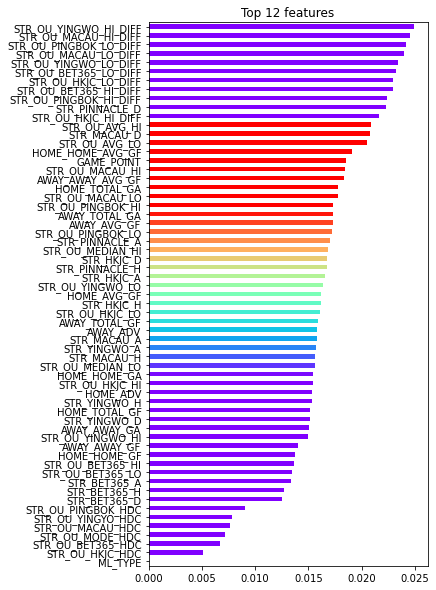

In [71]:
# Get feature importances
rf = model2.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

n = 12
plt.figure(figsize=(5,10))
plt.title(f'Top {n} features')
importances.sort_values().plot.barh(color = iter(cm.rainbow(np.linspace(-1.1,1.5))));

In [112]:
importances.sort_values()

ML_TYPE                   0.000000
STR_OU_HKJC_HDC           0.005140
STR_OU_BET365_HDC         0.006699
STR_OU_MODE_HDC           0.007173
STR_OU_MACAU_HDC          0.007624
STR_OU_YINGYO_HDC         0.007789
STR_OU_PINGBOK_HDC        0.009021
STR_BET365_D              0.012488
STR_BET365_H              0.012719
STR_BET365_A              0.013385
STR_OU_BET365_LO          0.013464
STR_OU_BET365_HI          0.013677
HOME_HOME_GF              0.013791
AWAY_AWAY_GF              0.014039
STR_OU_YINGWO_HI          0.014950
AWAY_AWAY_GA              0.015041
STR_YINGWO_D              0.015125
HOME_TOTAL_GF             0.015126
STR_YINGWO_H              0.015347
HOME_ADV                  0.015386
STR_OU_HKJC_HI            0.015392
HOME_HOME_GA              0.015451
STR_OU_MEDIAN_LO          0.015608
STR_MACAU_H               0.015657
STR_YINGWO_A              0.015761
STR_MACAU_A               0.015835
AWAY_ADV                  0.015838
AWAY_TOTAL_GF             0.015866
STR_OU_HKJC_LO      

In [217]:
model3 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    LogisticRegression(max_iter=300, random_state=42)
)

model3.fit(X_train, y_train)

print('1st LogisticRegression - Training Accuracy:', model3.score(X_train, y_train))
print('1st LogisticRegression - Validation Accuracy:', model3.score(X_val, y_val))
print('1st LogisticRegression - Test Accuracy:', model3.score(X_test, y_test))


1st LogisticRegression - Training Accuracy: 0.5906025179856115
1st LogisticRegression - Validation Accuracy: 0.5405572755417957
1st LogisticRegression - Test Accuracy: 0.5320121951219512


C:\Users\willi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [218]:
#remove negative features
#X_train = X_train[['STR_HKJC_D','HOME_HOME_AVG_GF','STR_MACAU_D','STR_YINGWO_D','STR_OU_PINGBOK_HDC','STR_YINGWO_H','AWAY_AWAY_AVG_GF','STR_OU_MACAU_HDC','STR_MACAU_H','STR_MACAU_A','AWAY_AVG_GF','STR_OU_HKJC_HI','HOME_AVG_GF']]
#X_val = X_val[['STR_HKJC_D','HOME_HOME_AVG_GF','STR_MACAU_D','STR_YINGWO_D','STR_OU_PINGBOK_HDC','STR_YINGWO_H','AWAY_AWAY_AVG_GF','STR_OU_MACAU_HDC','STR_MACAU_H','STR_MACAU_A','AWAY_AVG_GF','STR_OU_HKJC_HI','HOME_AVG_GF']]
#X_test = X_test[['STR_HKJC_D','HOME_HOME_AVG_GF','STR_MACAU_D','STR_YINGWO_D','STR_OU_PINGBOK_HDC','STR_YINGWO_H','AWAY_AWAY_AVG_GF','STR_OU_MACAU_HDC','STR_MACAU_H','STR_MACAU_A','AWAY_AVG_GF','STR_OU_HKJC_HI','HOME_AVG_GF']]

# X_train = X_train[['STR_OU_MACAU_LO_DIFF','STR_OU_YINGWO_HI_DIFF','STR_OU_BET365_HI_DIFF','STR_OU_PINGBOK_LO_DIFF','STR_OU_PINGBOK_HI_DIFF','STR_OU_YINGWO_LO_DIFF','STR_OU_BET365_LO_DIFF','STR_OU_MACAU_HI_DIFF','STR_OU_HKJC_LO_DIFF','STR_OU_HKJC_HI_DIFF','STR_PINNACLE_D','STR_OU_AVG_LO','STR_OU_AVG_HI']]
# X_val = X_val[['STR_OU_MACAU_LO_DIFF','STR_OU_YINGWO_HI_DIFF','STR_OU_BET365_HI_DIFF','STR_OU_PINGBOK_LO_DIFF','STR_OU_PINGBOK_HI_DIFF','STR_OU_YINGWO_LO_DIFF','STR_OU_BET365_LO_DIFF','STR_OU_MACAU_HI_DIFF','STR_OU_HKJC_LO_DIFF','STR_OU_HKJC_HI_DIFF','STR_PINNACLE_D','STR_OU_AVG_LO','STR_OU_AVG_HI']]
# X_test = X_test[['STR_OU_MACAU_LO_DIFF','STR_OU_YINGWO_HI_DIFF','STR_OU_BET365_HI_DIFF','STR_OU_PINGBOK_LO_DIFF','STR_OU_PINGBOK_HI_DIFF','STR_OU_YINGWO_LO_DIFF','STR_OU_BET365_LO_DIFF','STR_OU_MACAU_HI_DIFF','STR_OU_HKJC_LO_DIFF','STR_OU_HKJC_HI_DIFF','STR_PINNACLE_D','STR_OU_AVG_LO','STR_OU_AVG_HI']]

X_train = X_train[['STR_OU_MACAU_HDC','HOME_ADV','STR_HKJC_D','STR_PINNACLE_H','STR_YINGWO_D','AWAY_TOTAL_GF']]
X_val = X_val[['STR_OU_MACAU_HDC','HOME_ADV','STR_HKJC_D','STR_PINNACLE_H','STR_YINGWO_D','AWAY_TOTAL_GF']]
X_test = X_test[['STR_OU_MACAU_HDC','HOME_ADV','STR_HKJC_D','STR_PINNACLE_H','STR_YINGWO_D','AWAY_TOTAL_GF']]

In [219]:
from xgboost import XGBClassifier
model1 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=12, random_state=42, n_jobs=-1, learning_rate=0.097, subsample=1)
)

model1.fit(X_train, y_train)

print('2nd XGBClassifier - Training Accuracy:', model1.score(X_train, y_train))
print('2nd XGBClassifier - Validation Accuracy:', model1.score(X_val, y_val))
print('2nd XGBClassifier - Test Accuracy:', model1.score(X_test, y_test))


2nd XGBClassifier - Training Accuracy: 0.6400629496402878
2nd XGBClassifier - Validation Accuracy: 0.5684210526315789
2nd XGBClassifier - Test Accuracy: 0.5564024390243902


In [220]:
model2 = Pipeline([
                  ('oe', ce.OrdinalEncoder()),
                  ('impute', SimpleImputer(strategy='mean')),
                  ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

model2.fit(X_train, y_train)

print('2nd RandomForestClassifier - Training accuracy:', model2.score(X_train, y_train))
print('2nd RandomForestClassifier - Validation accuracy:', model2.score(X_val, y_val))
print('2nd RandomForestClassifier - Test accuracy:', model2.score(X_test, y_test))

2nd RandomForestClassifier - Training accuracy: 0.9997751798561151
2nd RandomForestClassifier - Validation accuracy: 0.5455108359133127
2nd RandomForestClassifier - Test accuracy: 0.5266768292682927


In [221]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [222]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(estimator=RandomForestClassifier(n_jobs=-1,
                                                       random_state=42),
                      random_state=42, scoring='accuracy')

In [223]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_test.columns.tolist()
)

Weight,Feature
0.0312 ± 0.0161,STR_OU_MACAU_HDC
0.0166 ± 0.0224,STR_HKJC_D
0.0059 ± 0.0119,STR_PINNACLE_H
0.0042 ± 0.0204,AWAY_TOTAL_GF
0.0028 ± 0.0062,HOME_ADV
-0.0085 ± 0.0094,STR_YINGWO_D


In [224]:
model3 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    LogisticRegression(random_state=42)
)

model3.fit(X_train, y_train)

print('2nd LogisticRegression - Training Accuracy:', model3.score(X_train, y_train))
print('2nd LogisticRegression - Validation Accuracy:', model3.score(X_val, y_val))
print('2nd LogisticRegression - Test Accuracy:', model3.score(X_test, y_test))


2nd LogisticRegression - Training Accuracy: 0.5825089928057554
2nd LogisticRegression - Validation Accuracy: 0.5603715170278638
2nd LogisticRegression - Test Accuracy: 0.5655487804878049


In [225]:
import matplotlib.pyplot as plt


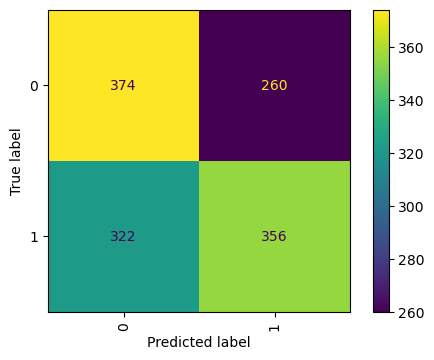

In [226]:
#Confusion graph
from sklearn.metrics import plot_confusion_matrix, classification_report

plt.rcParams['figure.dpi'] = 100
plot_confusion_matrix(model1, X_test, y_test, values_format='.0f', xticks_rotation='vertical')

In [227]:
# df1.tail()

In [239]:
final = df[['MATCH_ID','MATCH_DATETIME', 'ML_TYPE', 'LEAGUE', 'HOME_TEAM', 'AWAY_TEAM', 'HOME_FT_GOAL', 'AWAY_FT_GOAL', 'STR_OU_MACAU_HDC', 'STR_OU_MACAU_HI', 'STR_OU_MACAU_LO', 'STR_OU_HKJC_HDC', 'STR_OU_HKJC_HI', 'STR_OU_HKJC_LO', 'TOTAL_GOAL_COUNT', ou_hdc]]

final = final.query('ML_TYPE == "TEST"')

In [240]:
y_pred = model1.predict(X_test)
class_probabilities = model1.predict_proba(X_test)

pred = pd.DataFrame(y_pred, columns=['pred'])
prob = pd.DataFrame(class_probabilities, columns=['prob0','prob1' ])

final.reset_index(drop=True, inplace=True)
pred.reset_index(drop=True, inplace=True)
prob.reset_index(drop=True, inplace=True)

fin = pd.concat([final, prob, pred], axis=1)


In [241]:
# for i,j in fin.iterrows():
#     if fin.loc[i, 'prob0'] >= 0.6:
#         print(fin.loc[[i]])
#         print('%s	%s	%s	%s	%s	%s	%s	%s	%s	%s	%s	%s	%s' % (fin.loc[i, 'MATCH_DATETIME'],fin.loc[i, 'HOME_TEAM'],fin.loc[i, 'AWAY_TEAM'],fin.loc[i, 'HOME_FT_GOAL'],fin.loc[i, 'AWAY_FT_GOAL'],fin.loc[i, 'STR_HKJC_HILO_HANDICAP'],fin.loc[i, 'STR_HKJC_HILO_HI'],fin.loc[i, 'STR_HKJC_HILO_LO'],fin.loc[i, 'TOTAL_GOAL_COUNT'],fin.loc[i, 'OU25'],fin.loc[i, 'prob0'],fin.loc[i, 'prob1'],fin.loc[i, 'pred']))

In [242]:
#def a(fin):
#    if (fin['prob0'] >= 0.55 or fin['prob1'] >= 0.55):
#        return 1
#    else:
#      return 0
#fin = fin.assign(O55=fin.apply(a, axis=1))

In [243]:
bet_amount = 1000

home_goal_col = 'HOME_FT_GOAL'
away_goal_col = 'AWAY_FT_GOAL'

macau_hdc_col = 'STR_OU_MACAU_HDC'
macau_hi_col = 'STR_OU_MACAU_HI'
macau_lo_col = 'STR_OU_MACAU_LO'

hkjc_hdc_col = 'STR_OU_HKJC_HDC'
hkjc_hi_col = 'STR_OU_HKJC_HI'
hkjc_lo_col = 'STR_OU_HKJC_LO'

In [244]:
# fin['Correct'] = (fin[ou_hdc] == fin['pred']).astype(int)
import math

for i,j in fin.iterrows():
    if fin.loc[i, home_goal_col]+fin.loc[i, away_goal_col] > fin.loc[i, macau_hdc_col]:
        fin.loc[i, 'Correct_MS'] = str('1')
    elif fin.loc[i, home_goal_col]+fin.loc[i, away_goal_col] == fin.loc[i, macau_hdc_col]:
        fin.loc[i, 'Correct_MS'] = str('-')
    elif math.isnan(fin.loc[i, home_goal_col]):
        fin.loc[i, home_goal_col] = None
        fin.loc[i, away_goal_col] = None
        fin.loc[i, ou_hdc] = None
        fin.loc[i, 'Correct_MS'] = str('NaN')
    else:
        fin.loc[i, 'Correct_MS'] = str('0')
        
    if fin.loc[i, home_goal_col]+fin.loc[i, away_goal_col] > fin.loc[i, hkjc_hdc_col]:
        fin.loc[i, 'Correct_JC'] = str('1')
    elif fin.loc[i, home_goal_col]+fin.loc[i, away_goal_col] == fin.loc[i, hkjc_hdc_col]:
        fin.loc[i, 'Correct_JC'] = str('-')
    elif math.isnan(fin.loc[i, home_goal_col]):
        fin.loc[i, home_goal_col] = None
        fin.loc[i, away_goal_col] = None
        fin.loc[i, ou_hdc] = None
        fin.loc[i, 'Correct_JC'] = str('NaN')
    else:
        fin.loc[i, 'Correct_JC'] = str('0')
        
# fin

In [245]:
#betting on every single match
macau_money = []
macau_count = 0
hkjc_money = []
hkjc_count = 0

for i,j in fin.iterrows():
    if fin.loc[i, 'prob1'] >= 0.62:
        # Macau
        if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, macau_hdc_col]:
            macau_count = (macau_count + (bet_amount*fin.loc[i, macau_hi_col]))
            macau_money.append(macau_count)
        elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, macau_hdc_col]:
            macau_money.append(macau_count)
        else:
            macau_count = macau_count - bet_amount
            macau_money.append(macau_count)
            
        # HKJC
        if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, hkjc_hdc_col]:
            hkjc_count = (hkjc_count + (bet_amount*fin.loc[i, hkjc_hi_col]))
            hkjc_money.append(hkjc_count)
        elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, hkjc_hdc_col]:
            hkjc_money.append(hkjc_count)
        else:
            hkjc_count = hkjc_count - bet_amount
            hkjc_money.append(hkjc_count)
    else:
        macau_money.append(macau_count)
        hkjc_money.append(hkjc_count)
        
#   if fin.loc[i, 'Correct'] == 1:
#       if fin.loc[i, ou_hdc] == 1:
#         count = (count + (100*fin.loc[i, hi_col]))
#         money.append(count)
#       elif fin.loc[i, ou_hdc] == 0:
#         count = (count + (100*fin.loc[i, lo_col]))
#         money.append(count)
#   else:
#     count = count - 100
#     money.append(count)
    
fin.loc[:, 'Model1_MS'] = pd.Series(macau_money)
fin.loc[:, 'Model1_JC'] = pd.Series(hkjc_money)

In [246]:
#betting on every over (baseline)
macau_money = []
macau_count = 0
hkjc_money = []
hkjc_count = 0

for i,j in fin.iterrows():
    if fin.loc[i, 'prob1'] >= 0.5:
        # Macau
        if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, macau_hdc_col]:
            macau_count = (macau_count + (bet_amount*fin.loc[i, macau_hi_col]))
            macau_money.append(macau_count)
        elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, macau_hdc_col]:
            macau_money.append(macau_count)
        else:
            macau_count = macau_count - bet_amount
            macau_money.append(macau_count)
            
        # HKJC
        if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, hkjc_hdc_col]:
            hkjc_count = (hkjc_count + (bet_amount*fin.loc[i, hkjc_hi_col]))
            hkjc_money.append(hkjc_count)
        elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, hkjc_hdc_col]:
            hkjc_money.append(hkjc_count)
        else:
            hkjc_count = hkjc_count - bet_amount
            hkjc_money.append(hkjc_count)
    else:
        macau_money.append(macau_count)
        hkjc_money.append(hkjc_count)
        
#     if fin.loc[i, ou_hdc] == 1:
#         count = (count + (100*fin.loc[i, hi_col]))
#         money.append(count)
#     else:
#       count = count - 100
#       money.append(count)
    
fin.loc[:, 'Baseline_MS'] = pd.Series(macau_money)
fin.loc[:, 'Baseline_JC'] = pd.Series(hkjc_money)

In [247]:
fin[ou_hdc].value_counts(normalize=True)

1.0    0.528861
0.0    0.471139
Name: OU25, dtype: float64

In [248]:
# fin

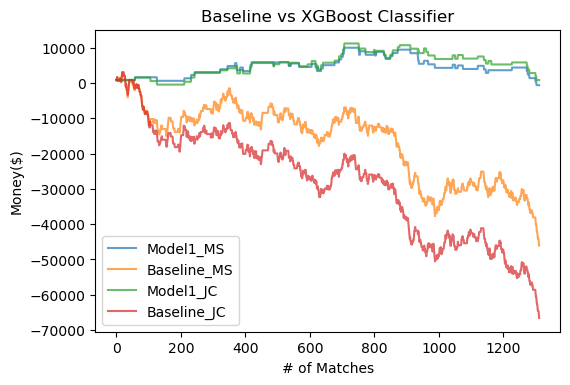

In [249]:
fin.plot(y=["Model1_MS", "Baseline_MS", "Model1_JC", "Baseline_JC"], alpha=0.7)
plt.title('Baseline vs XGBoost Classifier')
plt.xlabel('# of Matches')
plt.ylabel('Money($)')

plt.show()

In [250]:
fin = fin.drop(["Model1_MS", "Baseline_MS", "Model1_JC", "Baseline_JC"], axis=1)

# fin = fin.drop(['MS_PL_0.55','JC_PL_0.55','MS_PL_0.60','JC_PL_0.60','MS_PL_0.62','JC_PL_0.62','MS_PL_0.65','JC_PL_0.65'], axis=1)

In [251]:
# #betting on only 55% Confidence 
# macau_money = []
# macau_count = 0 
# hkjc_money = []
# hkjc_count = 0 
# prob = 0.55

# for i,j in fin.iterrows():
#     if fin.loc[i, 'prob1'] >= prob:
#         # Macau
#         if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, macau_hdc_col]:
#             macau_count = (macau_count + (bet_amount*fin.loc[i, macau_hi_col]))
#             macau_money.append(macau_count)
#         elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, macau_hdc_col]:
#             macau_money.append(macau_count)
#         else:
#             macau_count = macau_count - bet_amount
#             macau_money.append(macau_count)
            
#         # HKJC
#         if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, hkjc_hdc_col]:
#             hkjc_count = (hkjc_count + (bet_amount*fin.loc[i, hkjc_hi_col]))
#             hkjc_money.append(hkjc_count)
#         elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, hkjc_hdc_col]:
#             hkjc_money.append(hkjc_count)
#         else:
#             hkjc_count = hkjc_count - bet_amount
#             hkjc_money.append(hkjc_count)
#     else:
#         macau_money.append(macau_count)
#         hkjc_money.append(hkjc_count)
    
# fin.loc[:, 'MS_PL_0.55'] = pd.Series(macau_money)
# fin.loc[:, 'JC_PL_0.55'] = pd.Series(hkjc_money)

In [252]:
#betting on only 60% Confidence 
macau_money = []
macau_count = 0 
hkjc_money = []
hkjc_count = 0 
prob = 0.6

for i,j in fin.iterrows():
    if fin.loc[i, 'prob1'] >= prob:
        # Macau
        if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, macau_hdc_col]:
            macau_count = (macau_count + (bet_amount*fin.loc[i, macau_hi_col]))
            macau_money.append(macau_count)
        elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, macau_hdc_col]:
            macau_money.append(macau_count)
        else:
            macau_count = macau_count - bet_amount
            macau_money.append(macau_count)
            
        # HKJC
        if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, hkjc_hdc_col]:
            hkjc_count = (hkjc_count + (bet_amount*fin.loc[i, hkjc_hi_col]))
            hkjc_money.append(hkjc_count)
        elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, hkjc_hdc_col]:
            hkjc_money.append(hkjc_count)
        else:
            hkjc_count = hkjc_count - bet_amount
            hkjc_money.append(hkjc_count)
    else:
        macau_money.append(macau_count)
        hkjc_money.append(hkjc_count)
    
fin.loc[:, 'MS_PL_0.60'] = pd.Series(macau_money)
fin.loc[:, 'JC_PL_0.60'] = pd.Series(hkjc_money)

In [253]:
#betting on only 61.5% Confidence 
macau_money = []
macau_count = 0 
hkjc_money = []
hkjc_count = 0 
prob = 0.615

for i,j in fin.iterrows():
    if fin.loc[i, 'prob1'] >= prob:
        # Macau
        if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, macau_hdc_col]:
            macau_count = (macau_count + (bet_amount*fin.loc[i, macau_hi_col]))
            macau_money.append(macau_count)
        elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, macau_hdc_col]:
            macau_money.append(macau_count)
        else:
            macau_count = macau_count - bet_amount
            macau_money.append(macau_count)
            
        # HKJC
        if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, hkjc_hdc_col]:
            hkjc_count = (hkjc_count + (bet_amount*fin.loc[i, hkjc_hi_col]))
            hkjc_money.append(hkjc_count)
        elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, hkjc_hdc_col]:
            hkjc_money.append(hkjc_count)
        else:
            hkjc_count = hkjc_count - bet_amount
            hkjc_money.append(hkjc_count)
    else:
        macau_money.append(macau_count)
        hkjc_money.append(hkjc_count)
    
fin.loc[:, 'MS_PL_0.615'] = pd.Series(macau_money)
fin.loc[:, 'JC_PL_0.615'] = pd.Series(hkjc_money)

In [254]:
#betting on only 62% Confidence 
macau_money = []
macau_count = 0 
hkjc_money = []
hkjc_count = 0 
prob = 0.62

for i,j in fin.iterrows():
    if fin.loc[i, 'prob1'] >= prob:
        # Macau
        if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, macau_hdc_col]:
            macau_count = (macau_count + (bet_amount*fin.loc[i, macau_hi_col]))
            macau_money.append(macau_count)
        elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, macau_hdc_col]:
            macau_money.append(macau_count)
        else:
            macau_count = macau_count - bet_amount
            macau_money.append(macau_count)
            
        # HKJC
        if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, hkjc_hdc_col]:
            hkjc_count = (hkjc_count + (bet_amount*fin.loc[i, hkjc_hi_col]))
            hkjc_money.append(hkjc_count)
        elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, hkjc_hdc_col]:
            hkjc_money.append(hkjc_count)
        else:
            hkjc_count = hkjc_count - bet_amount
            hkjc_money.append(hkjc_count)
    else:
        macau_money.append(macau_count)
        hkjc_money.append(hkjc_count)
    
fin.loc[:, 'MS_PL_0.62'] = pd.Series(macau_money)
fin.loc[:, 'JC_PL_0.62'] = pd.Series(hkjc_money)

In [255]:
# #betting on only 65% Confidence 
# macau_money = []
# macau_count = 0 
# hkjc_money = []
# hkjc_count = 0 
# prob = 0.65

# for i,j in fin.iterrows():
#     if fin.loc[i, 'prob1'] >= prob:
#         # Macau
#         if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, macau_hdc_col]:
#             macau_count = (macau_count + (bet_amount*fin.loc[i, macau_hi_col]))
#             macau_money.append(macau_count)
#         elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, macau_hdc_col]:
#             macau_money.append(macau_count)
#         else:
#             macau_count = macau_count - bet_amount
#             macau_money.append(macau_count)
            
#         # HKJC
#         if fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] > fin.loc[i, hkjc_hdc_col]:
#             hkjc_count = (hkjc_count + (bet_amount*fin.loc[i, hkjc_hi_col]))
#             hkjc_money.append(hkjc_count)
#         elif fin.loc[i, home_goal_col] + fin.loc[i, away_goal_col] == fin.loc[i, hkjc_hdc_col]:
#             hkjc_money.append(hkjc_count)
#         else:
#             hkjc_count = hkjc_count - bet_amount
#             hkjc_money.append(hkjc_count)
#     else:
#         macau_money.append(macau_count)
#         hkjc_money.append(hkjc_count)
    
# fin.loc[:, 'MS_PL_0.65'] = pd.Series(macau_money)
# fin.loc[:, 'JC_PL_0.65'] = pd.Series(hkjc_money)

In [256]:
hi_prob = 0.62
# print('MATCH_DATETIME > \'%s\'' % current_match_date)
# finq = fin.query('MATCH_DATETIME > \'%s\' & prob1>=%s' % (current_match_date, hi_prob))
# finq = fin.query('prob1>=%s' % (hi_prob))
# finq

# finq.tail(20)
# fin.tail(50)
# fin.head(50)
# finq = finq.drop(['HOME_FT_GOAL','AWAY_FT_GOAL','TOTAL_GOAL_COUNT','OU25','prob0','Correct','PL 0.55','PL 0.6','PL 0.65','PL 0.7'], axis=1)
# finq

# fin

test_result = fin
test_result

,MATCH_ID,MATCH_DATETIME,ML_TYPE,LEAGUE,HOME_TEAM,AWAY_TEAM,HOME_FT_GOAL,AWAY_FT_GOAL,STR_OU_MACAU_HDC,STR_OU_MACAU_HI,STR_OU_MACAU_LO,STR_OU_HKJC_HDC,STR_OU_HKJC_HI,STR_OU_HKJC_LO,TOTAL_GOAL_COUNT,OU25,prob0,prob1,pred,Correct_MS,Correct_JC,MS_PL_0.60,JC_PL_0.60,MS_PL_0.615,JC_PL_0.615,MS_PL_0.62,JC_PL_0.62
0,1884677,2020-09-01 02:00:00,TEST,荷乙,迪加史卓普,丹博斯治,4.0,2.0,3.25,0.77,0.83,3.5,0.90,0.80,6.0,1.0,0.330049,0.669951,1,1,1,770.0,900.0,770.0,900.0,770.0,900.0
1,1880418,2020-09-01 10:05:00,TEST,墨西聯,萊昂,阿特拿斯,2.0,1.0,2.50,0.78,0.92,2.5,0.70,1.02,3.0,1.0,0.567081,0.432919,0,1,1,770.0,900.0,770.0,900.0,770.0,900.0
2,1912952,2020-09-02 00:30:00,TEST,英錦賽,AFC溫布頓(中),查爾頓,2.0,1.0,2.75,0.93,0.67,2.5,0.70,1.02,3.0,1.0,0.496796,0.503204,1,1,1,770.0,900.0,770.0,900.0,770.0,900.0
3,1912953,2020-09-02 02:00:00,TEST,英錦賽,卡素爾,費列活特,1.0,3.0,2.50,0.78,0.82,2.5,0.75,0.95,4.0,1.0,0.594731,0.405269,0,1,1,770.0,900.0,770.0,900.0,770.0,900.0
4,1908517,2020-09-02 08:00:00,TEST,美職業,多倫多FC,蒙特利爾衝擊,0.0,1.0,2.75,0.90,0.80,2.5,0.65,1.10,1.0,0.0,0.410117,0.589883,1,0,0,770.0,900.0,770.0,900.0,770.0,900.0
5,1873058,2020-09-02 18:00:00,TEST,日職乙,大宮松鼠,京都不死鳥,1.0,0.0,2.25,0.77,0.93,2.5,1.10,0.65,1.0,0.0,0.524482,0.475518,0,0,0,770.0,900.0,770.0,900.0,770.0,900.0
6,1873059,2020-09-02 18:00:00,TEST,日職乙,千葉市原,福岡黃蜂,2.0,2.0,2.25,0.91,0.79,2.5,1.30,0.54,4.0,1.0,0.575605,0.424395,0,1,1,770.0,900.0,770.0,900.0,770.0,900.0
7,1873060,2020-09-02 18:00:00,TEST,日職乙,德島漩渦,水戶蜀葵,1.0,2.0,2.50,0.92,0.78,2.5,0.88,0.82,3.0,1.0,0.501198,0.498802,0,1,1,770.0,900.0,770.0,900.0,770.0,900.0
8,1873061,2020-09-02 18:00:00,TEST,日職乙,甲府風林,草津溫泉,1.0,0.0,2.25,0.74,0.96,2.5,0.88,0.82,1.0,0.0,0.504647,0.495353,0,0,0,770.0,900.0,770.0,900.0,770.0,900.0
9,1873062,2020-09-02 18:00:00,TEST,日職乙,山形山神,山口雷法,0.0,0.0,2.50,0.79,0.91,2.5,0.80,0.90,0.0,0.0,0.524482,0.475518,0,0,0,770.0,900.0,770.0,900.0,770.0,900.0


In [258]:
import math
import gspread
from oauth2client.service_account import ServiceAccountCredentials

col_ml_type = '253'

gsheet_data = []
# Insert db
for i, j in test_result.iterrows():
    col_match_id = int(test_result.loc[i, 'MATCH_ID'])
    col_match_datetime = str(test_result.loc[i, 'MATCH_DATETIME'])
    col_league = str(test_result.loc[i, 'LEAGUE'])
    col_home_team = str(test_result.loc[i, 'HOME_TEAM'])
    col_away_team = str(test_result.loc[i, 'AWAY_TEAM'])
    col_home_ft_goal = test_result.loc[i, 'HOME_FT_GOAL']
    if math.isnan(col_home_ft_goal):
        col_home_ft_goal = None
        col_away_ft_goal = None
        col_total_goal_count = None
    else:
        col_home_ft_goal = int(test_result.loc[i, 'HOME_FT_GOAL'])
        col_away_ft_goal = int(test_result.loc[i, 'AWAY_FT_GOAL'])
        col_total_goal_count = int(test_result.loc[i, 'TOTAL_GOAL_COUNT'])
    col_str_ou_macau_hdc = float(test_result.loc[i, 'STR_OU_MACAU_HDC'])
    col_str_ou_macau_hi = float(test_result.loc[i, 'STR_OU_MACAU_HI'])
    col_str_ou_macau_lo = float(test_result.loc[i, 'STR_OU_MACAU_LO'])
    col_str_ou_hkjc_hdc = float(test_result.loc[i, 'STR_OU_HKJC_HDC'])
    col_str_ou_hkjc_hi = float(test_result.loc[i, 'STR_OU_HKJC_HI'])
    col_str_ou_hkjc_lo = float(test_result.loc[i, 'STR_OU_HKJC_LO'])
    col_ou_hdc = test_result.loc[i, ou_hdc]
    if col_home_ft_goal is None:
        col_ou_hdc = None
    else:
        col_ou_hdc = int(test_result.loc[i, ou_hdc])
    col_prob0 = float(test_result.loc[i, 'prob0'])
    col_prob1 = float(test_result.loc[i, 'prob1'])
    col_pred = int(test_result.loc[i, 'pred'])
    gsheet_data.append([col_match_id, col_match_datetime, col_ml_type, col_league, col_home_team, col_away_team, col_home_ft_goal, col_away_ft_goal, col_str_ou_macau_hdc,
                        col_str_ou_macau_hi, col_str_ou_macau_lo, col_str_ou_hkjc_hdc, col_str_ou_hkjc_hi, col_str_ou_hkjc_lo, col_total_goal_count, col_ou_hdc, col_prob0, col_prob1, col_pred])

# Google sheets
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/spreadsheets",
         "https://www.googleapis.com/auth/drive.file", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name(
    "overunderml.json", scope)
client = gspread.authorize(creds)
sheet = client.open("ML OverUnder").worksheet("253")

start_row = 4
end_row = sheet.row_count
if end_row >= start_row:
    sheet.delete_rows(start_row, end_row)

sheet.append_rows(gsheet_data)


{'spreadsheetId': '1r9Qp88F7j5qIAf4-jxj7e6_8e48rVSaQ9ZWuYjF6uwI',
 'tableRange': "'253'!A1:AA3",
 'updates': {'spreadsheetId': '1r9Qp88F7j5qIAf4-jxj7e6_8e48rVSaQ9ZWuYjF6uwI',
  'updatedRange': "'253'!A4:S1315",
  'updatedRows': 1312,
  'updatedColumns': 19,
  'updatedCells': 24808}}

In [49]:
# col_ml_type = '253'

# # Remove previous record
# sql = 'DELETE FROM OU_PREDICT WHERE ML_TYPE=:col_ml_type AND MATCH_DATE=:db_match_date'
# c.execute(sql, [col_ml_type,db_match_date])

# data_to_insert = []
# # Insert db
# for i,j in finq.iterrows():
#     col_match_id = int(fin.loc[i, 'MATCH_ID'])
#     col_match_datetime = str(fin.loc[i, 'MATCH_DATETIME'])
#     col_league = str(fin.loc[i, 'LEAGUE'])
#     col_home_team = str(fin.loc[i, 'HOME_TEAM'])
#     col_away_team = str(fin.loc[i, 'AWAY_TEAM'])
#     col_str_ou_macau_hdc = float(fin.loc[i, 'STR_OU_MACAU_HDC'])
#     col_str_ou_macau_hi = float(fin.loc[i, 'STR_OU_MACAU_HI'])
#     col_str_ou_macau_lo = float(fin.loc[i, 'STR_OU_MACAU_LO'])
#     col_str_ou_hkjc_hdc = float(fin.loc[i, 'STR_OU_HKJC_HDC'])
#     col_str_ou_hkjc_hi = float(fin.loc[i, 'STR_OU_HKJC_HI'])
#     col_str_ou_hkjc_lo = float(fin.loc[i, 'STR_OU_HKJC_LO'])
#     col_prob1 = float(fin.loc[i, 'prob1'])
#     data_to_insert.append([col_ml_type,col_match_id,col_match_datetime,col_league,col_home_team,col_away_team,col_str_ou_macau_hdc,col_str_ou_macau_hi,col_str_ou_macau_lo,col_str_ou_hkjc_hdc,col_str_ou_hkjc_hi,col_str_ou_hkjc_lo,col_prob1,db_match_date])

# sql = 'INSERT INTO OU_PREDICT (ML_TYPE,MATCH_ID,MATCH_DATETIME,LEAGUE,HOME_TEAM,AWAY_TEAM,STR_OU_MACAU_HDC,STR_OU_MACAU_HI,STR_OU_MACAU_LO,STR_OU_HKJC_HDC,STR_OU_HKJC_HI,STR_OU_HKJC_LO,HI_PROB,MATCH_DATE) VALUES (:col_ml_type,:col_match_id,TO_DATE(:col_match_datetime,\'YYYY-MM-DD HH24:MI:SS\'),:col_league,:col_home_team,:col_away_team,:col_str_ou_macau_hdc,:col_str_ou_macau_hi,:col_str_ou_macau_lo,:col_str_ou_hkjc_hdc,:col_str_ou_hkjc_hi,:col_str_ou_hkjc_lo,:col_prob1,:db_match_date)'
# c.executemany(sql, data_to_insert)
# connection.commit()

In [50]:
# final = df[['MATCH_ID','MATCH_DATETIME', 'ML_TYPE', 'LEAGUE', 'HOME_TEAM', 'AWAY_TEAM', 'HOME_FT_GOAL', 'AWAY_FT_GOAL', 'STR_OU_MACAU_HDC', 'STR_OU_MACAU_HI', 'STR_OU_MACAU_LO', 'STR_OU_HKJC_HDC', 'STR_OU_HKJC_HI', 'STR_OU_HKJC_LO', 'TOTAL_GOAL_COUNT', ou_hdc]]

# # final = final.query('ML_TYPE == "PREDICT"')

# y_pred = model1.predict(X_test)
# class_probabilities = model1.predict_proba(X_test)

# pred = pd.DataFrame(y_pred, columns=['pred'])
# prob = pd.DataFrame(class_probabilities, columns=['prob0','prob1'])

# final.reset_index(drop=True, inplace=True)
# pred.reset_index(drop=True, inplace=True)
# prob.reset_index(drop=True, inplace=True)

# fin = pd.concat([final, prob, pred], axis=1)

# fin = fin.query('MATCH_DATETIME>\'%s\'' % current_match_date)
# # fin = fin.query('MATCH_ID.notnull() & prob1>=%s & MATCH_DATETIME>\'%s\'' % (hi_prob, current_match_date))
# fin.reset_index(drop=True, inplace=True)
# # fin.sort_values('MATCH_DATETIME')
fin = fin.query('MATCH_DATETIME>\'%s\'' % current_match_date)
fin.reset_index(drop=True, inplace=True)
fin


,MATCH_ID,MATCH_DATETIME,ML_TYPE,LEAGUE,HOME_TEAM,AWAY_TEAM,HOME_FT_GOAL,AWAY_FT_GOAL,STR_OU_MACAU_HDC,STR_OU_MACAU_HI,STR_OU_MACAU_LO,STR_OU_HKJC_HDC,STR_OU_HKJC_HI,STR_OU_HKJC_LO,TOTAL_GOAL_COUNT,OU25,prob0,prob1,pred,Correct_MS,Correct_JC,MS_PL_0.60,JC_PL_0.60,MS_PL_0.615,JC_PL_0.615,MS_PL_0.62,JC_PL_0.62
0,1934484,2020-10-09 20:00:00,TEST,國際友誼,日本(中),喀麥隆,0.0,0.0,2.25,0.97,0.73,2.5,1.33,0.53,0.0,0.0,0.625275,0.374725,0,0,0,6780.0,7560.0,4500.0,6230.0,4390.0,5840.0
1,1837379,2020-10-10 02:30:00,TEST,智利甲,艾斯賓路拿,克里科,NaN,NaN,2.50,0.83,0.77,2.5,0.82,0.88,NaN,NaN,0.573039,0.426961,0,NaN,NaN,6780.0,7560.0,4500.0,6230.0,4390.0,5840.0
2,1936701,2020-10-10 02:30:00,TEST,國際友誼,尼日利亞(中),阿爾及利亞,NaN,NaN,2.00,0.83,0.87,2.5,1.45,0.48,NaN,NaN,0.585423,0.414578,0,NaN,NaN,6780.0,7560.0,4500.0,6230.0,4390.0,5840.0
3,1905492,2020-10-10 02:45:00,TEST,英甲,費列活特,侯城,NaN,NaN,2.50,0.76,0.84,2.5,0.97,0.74,NaN,NaN,0.512028,0.487972,0,NaN,NaN,6780.0,7560.0,4500.0,6230.0,4390.0,5840.0
4,1884746,2020-10-10 03:00:00,TEST,荷乙,FC燕豪芬,SBV精英隊,NaN,NaN,3.25,0.77,0.83,3.5,0.78,0.92,NaN,NaN,0.439329,0.560671,1,NaN,NaN,6780.0,7560.0,4500.0,6230.0,4390.0,5840.0
5,1837382,2020-10-10 05:00:00,TEST,智利甲,科金博,高路高路,NaN,NaN,2.25,0.73,0.87,2.5,0.90,0.80,NaN,NaN,0.514881,0.485119,0,NaN,NaN,6780.0,7560.0,4500.0,6230.0,4390.0,5840.0


In [51]:
# fin

In [52]:
# col_ml_type = '253'

# # Remove previous record
# # sql = 'DELETE FROM OU_PREDICT WHERE ML_TYPE=:col_ml_type AND MATCH_DATE=:db_match_date'
# # c.execute(sql, [col_ml_type,db_match_date])

# data_to_insert = []
# # Insert db
# for i,j in fin.iterrows():
#     col_match_id = int(fin.loc[i, 'MATCH_ID'])
#     col_match_datetime = str(fin.loc[i, 'MATCH_DATETIME'])
#     col_league = str(fin.loc[i, 'LEAGUE'])
#     col_home_team = str(fin.loc[i, 'HOME_TEAM'])
#     col_away_team = str(fin.loc[i, 'AWAY_TEAM'])
#     col_str_ou_macau_hdc = float(fin.loc[i, 'STR_OU_MACAU_HDC'])
#     col_str_ou_macau_hi = float(fin.loc[i, 'STR_OU_MACAU_HI'])
#     col_str_ou_macau_lo = float(fin.loc[i, 'STR_OU_MACAU_LO'])
#     col_str_ou_hkjc_hdc = float(fin.loc[i, 'STR_OU_HKJC_HDC'])
#     col_str_ou_hkjc_hi = float(fin.loc[i, 'STR_OU_HKJC_HI'])
#     col_str_ou_hkjc_lo = float(fin.loc[i, 'STR_OU_HKJC_LO'])
#     col_prob1 = float(fin.loc[i, 'prob1'])
#     data_to_insert.append([col_ml_type,col_match_id,col_match_datetime,col_league,col_home_team,col_away_team,col_str_ou_macau_hdc,col_str_ou_macau_hi,col_str_ou_macau_lo,col_str_ou_hkjc_hdc,col_str_ou_hkjc_hi,col_str_ou_hkjc_lo,col_prob1,db_match_date])

# sql = 'INSERT INTO OU_PREDICT (ML_TYPE,MATCH_ID,MATCH_DATETIME,LEAGUE,HOME_TEAM,AWAY_TEAM,STR_OU_MACAU_HDC,STR_OU_MACAU_HI,STR_OU_MACAU_LO,STR_OU_HKJC_HDC,STR_OU_HKJC_HI,STR_OU_HKJC_LO,HI_PROB,MATCH_DATE) VALUES (:col_ml_type,:col_match_id,TO_DATE(:col_match_datetime,\'YYYY-MM-DD HH24:MI:SS\'),:col_league,:col_home_team,:col_away_team,:col_str_ou_macau_hdc,:col_str_ou_macau_hi,:col_str_ou_macau_lo,:col_str_ou_hkjc_hdc,:col_str_ou_hkjc_hi,:col_str_ou_hkjc_lo,:col_prob1,:db_match_date)'
# c.executemany(sql, data_to_insert)
# connection.commit()

In [51]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    RandomForestClassifier(random_state=42, n_jobs=-1)
)

param_distributions = {
    'randomforestclassifier__n_estimators':[20,50,100,200],
    'randomforestclassifier__criterion':['gini', 'entropy'],
    'randomforestclassifier__max_features':[0.25,3,5],
    'randomforestclassifier__min_samples_split':[3,5,15],
    'randomforestclassifier__min_samples_leaf':[2,5],
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=5, 
    scoring='accuracy', 
    verbose=1, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.3s finished


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('simpleimputer',
                                              SimpleImputer(strategy='median')),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(n_jobs=-1,
                                                                     random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'randomforestclassifier__criterion': ['gini',
                                                                              'entropy'],
                                        'randomforestclassifier__max_features': [0.25,
                                      

In [52]:
print('Cross-validation Best Score:', search.best_score_)
print('Best Estimator:', search.best_params_)
print('Best Model:', search.best_estimator_)

Cross-validation Best Score: 0.5591286763311889
Best Estimator: {'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__min_samples_split': 15, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_features': 0.25, 'randomforestclassifier__criterion': 'gini'}
Best Model: Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=0.25, min_samples_leaf=2,
                                        min_samples_split=15, n_estimators=50,
                                        n_jobs=-1, random_state=42))])
